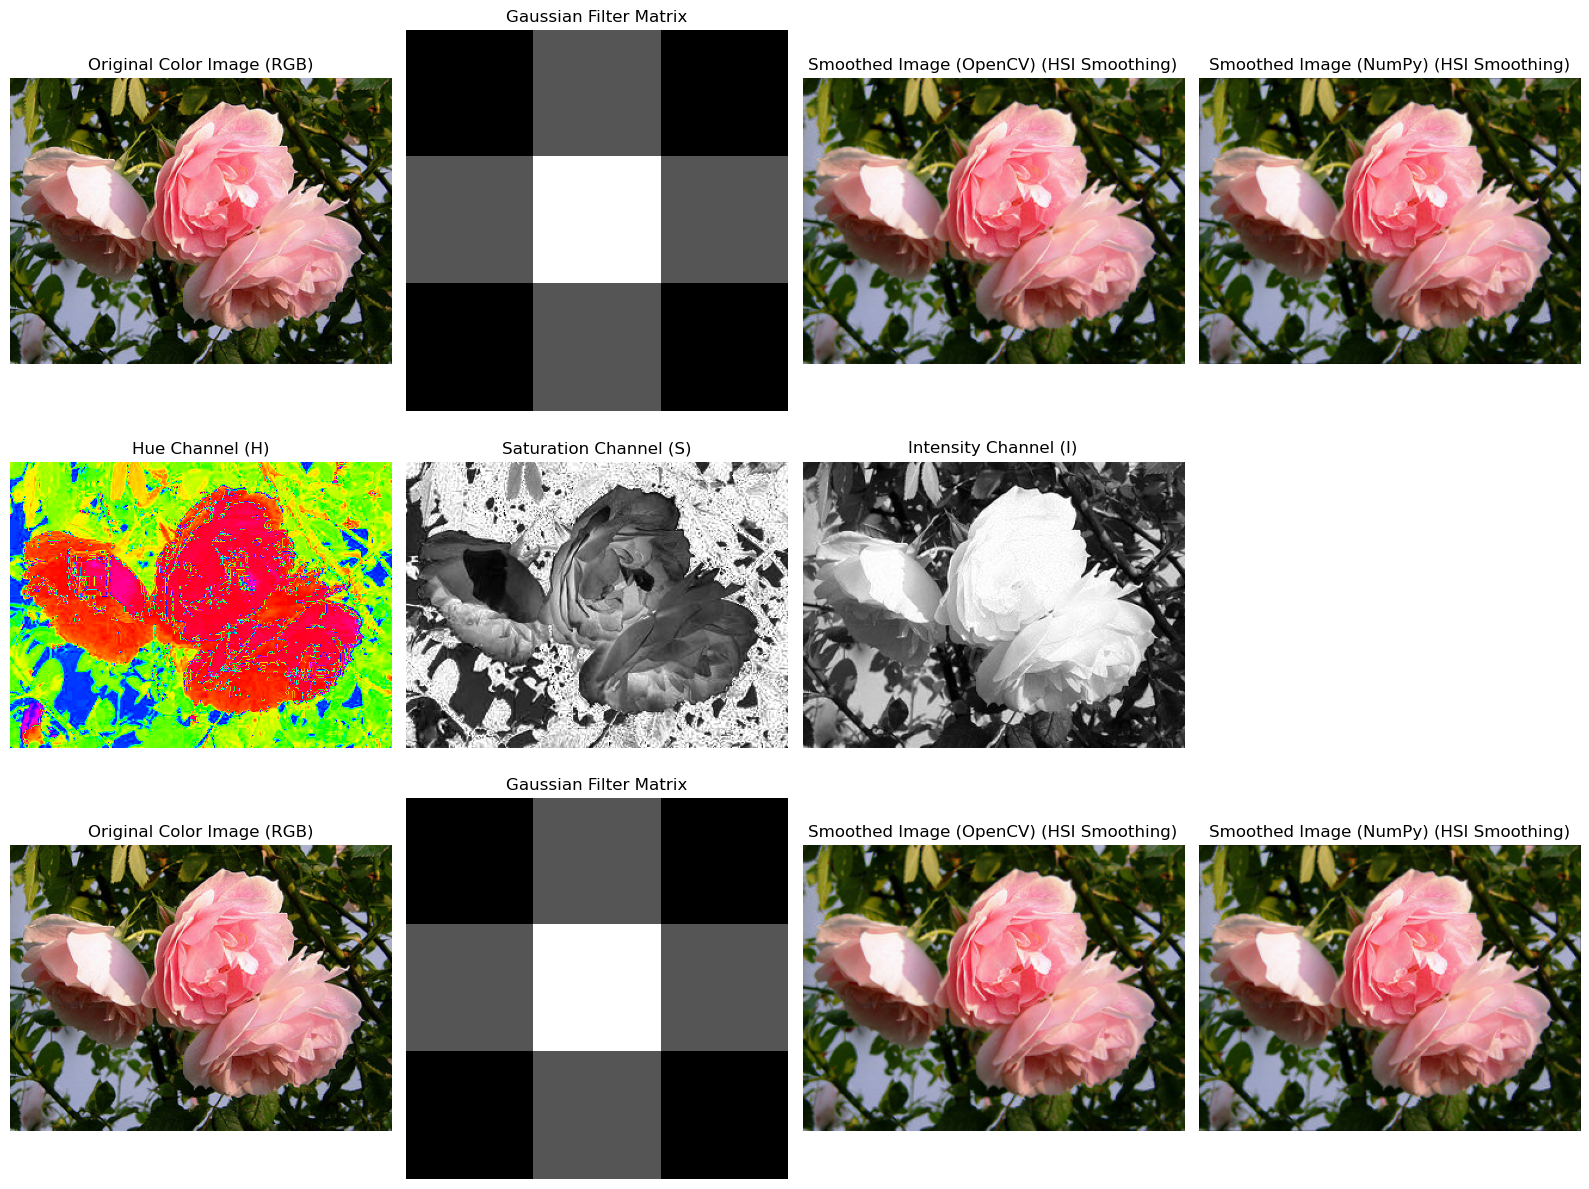

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ------------------------- Theoretical Explanation -------------------------
#
# Image smoothing (also known as blurring) is a fundamental operation in image processing 
# used to reduce noise and details in an image. In this example, we will focus on intensity 
# smoothing in the **HSI color model**.
#
# The **HSI (Hue, Saturation, Intensity) color model** separates the color information into 
# three components:
# - **Hue (H)**: Represents the color type.
# - **Saturation (S)**: Represents the intensity of the color.
# - **Intensity (I)**: Represents the brightness of the color.
#
# By smoothing the **Intensity (I)** channel in the HSI model, we can perform intensity 
# smoothing, which helps in reducing the noise or unwanted variations in the brightness 
# of the image while preserving the hue and saturation components.
#
# The convolution is performed on the **Intensity (I)** channel, and the H and S channels 
# are left unchanged to maintain the original color information.
#
# In this example, we apply a Gaussian filter to the Intensity (I) channel using two methods:
# 1. **OpenCV Method**: Using OpenCV's `cv2.filter2D()` function for convolution.
# 2. **NumPy Method**: By manually performing convolution using NumPy arrays.
#
# The goal of the code is to apply smoothing on the intensity (brightness) of the image and
# compare the results using both OpenCV and NumPy methods.
#
# In the output, we will:
# 1. Show the original image in the HSI model.
# 2. Display the Gaussian filter matrix.
# 3. Show the smoothed image using OpenCV's `filter2D`.
# 4. Show the smoothed image using NumPy's manual convolution on the Intensity channel.
#
# ------------------------- End of Theoretical Explanation -------------------------

# Function to display images and the Gaussian Kernel
def display_images(original, gaussian_filter, smoothed_color_opencv, smoothed_color_numpy,
                   title_original, title_gaussian_filter, title_smoothed_opencv, title_smoothed_numpy,
                   hue_channel, saturation_channel, intensity_channel):
    plt.figure(figsize=(16, 12))

    # First row: Original image, Gaussian filter, OpenCV smoothed image, NumPy smoothed image
    plt.subplot(3, 4, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Original color image
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.imshow(gaussian_filter, cmap='gray')  # Display Gaussian filter matrix as an image
    plt.title(title_gaussian_filter)
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.imshow(smoothed_color_opencv)  # OpenCV smoothed RGB image
    plt.title(f'{title_smoothed_opencv} (HSI Smoothing)')
    plt.axis('off')

    plt.subplot(3, 4, 4)
    plt.imshow(smoothed_color_numpy)  # NumPy smoothed RGB image
    plt.title(f'{title_smoothed_numpy} (HSI Smoothing)')
    plt.axis('off')

    # Second row: H, S, and I channels individually
    plt.subplot(3, 4, 5)
    plt.imshow(hue_channel, cmap='hsv')  # Hue channel visualization
    plt.title("Hue Channel (H)")
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.imshow(saturation_channel, cmap='gray')  # Saturation channel visualization
    plt.title("Saturation Channel (S)")
    plt.axis('off')

    plt.subplot(3, 4, 7)
    plt.imshow(intensity_channel, cmap='gray')  # Intensity channel visualization
    plt.title("Intensity Channel (I)")
    plt.axis('off')

    # Third row: Original image and Gaussian filter repeated for symmetry
    plt.subplot(3, 4, 9)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))  # Original color image again
    plt.title(title_original)
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.imshow(gaussian_filter, cmap='gray')  # Gaussian filter repeated
    plt.title(title_gaussian_filter)
    plt.axis('off')

    plt.subplot(3, 4, 11)
    plt.imshow(smoothed_color_opencv)  # OpenCV smoothed RGB image repeated
    plt.title(f'{title_smoothed_opencv} (HSI Smoothing)')
    plt.axis('off')

    plt.subplot(3, 4, 12)
    plt.imshow(smoothed_color_numpy)  # NumPy smoothed RGB image repeated
    plt.title(f'{title_smoothed_numpy} (HSI Smoothing)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Define kernel (Gaussian 3x3 kernel)
gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float32)

# Normalize the kernel by dividing by 16
gaussian_filter /= 16

# Function to perform convolution using NumPy
def convolve2d(image, kernel):
    """Convolve the image with the kernel using NumPy."""
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2

    # Pad the image to handle borders
    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Create an empty output image
    output_image = np.zeros_like(image)

    # Perform convolution
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output_image[i, j] = np.sum(region * kernel)  # Convolution operation

    return output_image

# ------------ Load the Color Image ------------- #
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)

# ------------ Convert to HSI Color Space ------------ #
# Convert the image from BGR to RGB, then to HSI
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to HSI using OpenCV
hsi_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)  # OpenCV uses HSV, which is similar to HSI

# Split the HSI channels
H, S, I = cv2.split(hsi_image)

# ------------ Apply Convolution to Intensity Channel ------------ #
# Apply convolution to the Intensity channel using OpenCV (cv2.filter2D)
smoothed_I_opencv = cv2.filter2D(I, -1, gaussian_filter)

# Merge the smoothed intensity channel back with the H and S channels for OpenCV result
smoothed_hsi_opencv = cv2.merge([H, S, smoothed_I_opencv])

# Apply convolution to the Intensity channel using NumPy (manual convolution)
smoothed_I_numpy = convolve2d(I, gaussian_filter)

# Merge the smoothed intensity channel back with the H and S channels for NumPy result
smoothed_hsi_numpy = cv2.merge([H, S, smoothed_I_numpy])

# ------------ Convert Back to RGB Color Space ------------ #
# Convert the processed HSI (HSV) image back to RGB color space for display
smoothed_rgb_opencv = cv2.cvtColor(smoothed_hsi_opencv, cv2.COLOR_HSV2RGB)
smoothed_rgb_numpy = cv2.cvtColor(smoothed_hsi_numpy, cv2.COLOR_HSV2RGB)

# ------------ Display Results ------------ #
# Display the original color image, Gaussian filter, and results of smoothing
display_images(image, gaussian_filter, smoothed_rgb_opencv, smoothed_rgb_numpy,
               'Original Color Image (RGB)', 'Gaussian Filter Matrix', 'Smoothed Image (OpenCV)','Smoothed Image (NumPy)')
